In [3]:
import time
import matplotlib as plt

In [4]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [5]:
A = X.to_numpy()
b = y.to_numpy().flatten()

A = (A - np.mean(A, axis=0)) / np.std(A, axis=0)  


In [6]:
A.shape, b.shape

((1030, 8), (1030,))

In [7]:
def LSE(A, x, b ):
    m = A.shape[0]
    LSE = (1/ 2* m)* np.linalg.norm(A@x -b, 2)**2
    return LSE

In [8]:
def LSE_grad(A, x, b):
    m = A.shape[0]
    grad = (1/ m) * A.T @ (A @ x - b)
    return grad

In [9]:
max_iter = 50 
ebsilon = 0.0001

x = np.zeros(A.shape[1])

In [10]:
def calculate_L(A): 
    m = A.shape[0]
    L = (1/m) * np.linalg.norm(A.T @ A, 2) 
    return L

In [11]:
def gradient_descent(A, x, b, iter_step, max_iter):
    for i in range(max_iter):
        x = x - iter_step * LSE_grad(A, x, b)
    return x

In [12]:
def calculate_L2(A, b):
    m = A.shape[0]
    L2 = (1/m) * (20*np.linalg.norm(A.T@ A, 2)**2+ np.linalg.norm(A.T @b))
    return L2

In [18]:
learning_rates = [0.1, 1/calculate_L(A), 1/calculate_L2(A, b)]

def gradient_descent(x0, learning_rate, max_iter, ebsilon, A, b):
    history = []
    x = x0
    for i in range(max_iter):
        grad = LSE_grad(A, x, b)
        new_x = x - learning_rate * grad
        if np.isnan(new_x).any() or np.isinf(new_x).any():
            return x, i, history
        if np.linalg.norm(grad) < ebsilon:
            return x, i , history
        
        history.append(LSE(A, x, b))
        x = new_x
    return x, i, history

In [14]:
def calculate_objective(x0, learning_rate_list, max_iter, ebsilon, A, b):
    times = []
    iterations = []
    gobal_min = []
    history_for_gammas = []
    
    for learning_rate in learning_rate_list:
        start = time.time()  
        x, i, history = gradient_descent(x0, learning_rate, max_iter, ebsilon, A, b) 
        end = time.time()  
        
        times.append(end - start)
        iterations.append(i)
        gobal_min.append(x)
        history_for_gammas.append(history)

    return times, iterations, gobal_min, history_for_gammas


In [19]:
times, iterations, global_min, history = calculate_objective(x, learning_rates, max_iter, ebsilon, A, b)
objective_values = [LSE(A, x, b) for x in global_min]


print("Objective Values: ", objective_values)
print("Learning Rate: ", learning_rates)
print("Time: ", times)
print("Iterations: ", iterations)
print("Global Min: ", global_min)

Objective Values:  [np.float64(739901775.5440855), np.float64(737979668.7260293), np.float64(828332634.926748)]
Learning Rate:  [0.1, np.float64(0.43857737822745846), np.float64(9.336203153918797e-06)]
Time:  [0.001994609832763672, 0.002526521682739258, 0.0010001659393310547]
Iterations:  [49, 49, 49]
Global Min:  [array([ 7.33095821,  3.79949116,  0.68670989, -5.51133548,  3.20050662,
       -1.47767978, -2.63929149,  6.78147191]), array([ 9.77780606,  6.27313915,  3.26173928, -5.49202652,  1.51603041,
       -0.68549094, -1.00732203,  7.12481462]), array([ 0.00387927,  0.00105077, -0.00082397, -0.00225699,  0.00285253,
       -0.00128512, -0.00130334,  0.00256299])]


In [23]:
history

[[np.float64(828423499.4909998),
  np.float64(810114234.5579022),
  np.float64(795903931.2100607),
  np.float64(784834162.5916563),
  np.float64(776177753.9265025),
  np.float64(769381436.4320526),
  np.float64(764023114.1494284),
  np.float64(759779905.0131286),
  np.float64(756404163.5001578),
  np.float64(753705440.1455367),
  np.float64(751536872.5994216),
  np.float64(749784894.7850418),
  np.float64(748361437.2642024),
  np.float64(747198002.594989),
  np.float64(746241155.0892248),
  np.float64(745449079.7915007),
  np.float64(744788951.388183),
  np.float64(744234917.8557147),
  np.float64(743766551.6209594),
  np.float64(743367656.97571),
  np.float64(743025349.5166339),
  np.float64(742729343.7305758),
  np.float64(742471400.1909529),
  np.float64(742244895.4231559),
  np.float64(742044486.267707),
  np.float64(741865847.2168051),
  np.float64(741705464.2453187),
  np.float64(741560472.4935178),
  np.float64(741428528.0806698),
  np.float64(741307706.5580068),
  np.float64(74

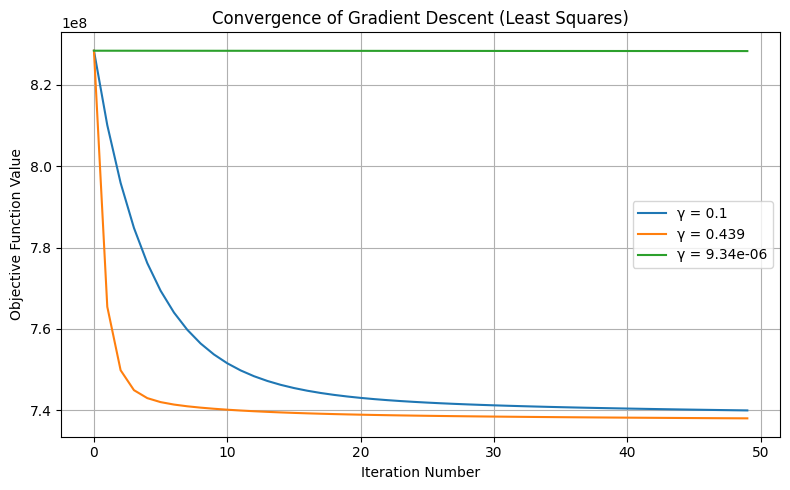

In [26]:
plt.figure(figsize=(8, 5))

for iteration, learning_rate in zip(history, learning_rates):
    plt.plot(iteration, label=f"γ = {learning_rate:.3g}")
plt.xlabel("Iteration Number")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Gradient Descent (Least Squares)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Інтерпретація результатів  

Після виконання градієнтного спуску з різними кроками $\gamma$, отримані такі значення цільової функції та збіжності:  

1. **$\gamma = 0.1$**  
   - Алгоритм збігається стабільно.  
   - Значення цільової функції поступово зменшується до мінімального рівня.  
   - Швидкість збіжності помірна, але покращується з ітераціями.  

2. **$\gamma = 0.439$**  
   - Цільова функція зменшується значно швидше, ніж при $\gamma = 0.1$.  
   - Досягає нижчого мінімуму за меншу кількість ітерацій.  
   - Крок близький до оптимального значення для цієї задачі.  

3. **$\gamma = 9.34 \times 10^{-6}$**  
   - Збіжність практично відсутня: функція залишається майже незмінною.  
   - Крок занадто малий, що призводить до повільного оновлення параметрів.  

### Висновок  

- **Розмір кроку $\gamma$ критично впливає на швидкість збіжності.**  
  - Занадто малий крок ($\gamma = 9.34 \times 10^{-6}$) призводить до практично нульового прогресу.  
  - Занадто великий крок може спричинити нестабільність або розбіжність.  
  - Оптимальний крок ($\gamma = 0.439$) забезпечує найшвидшу збіжність.  

- **Якщо важлива швидка збіжність**, варто вибирати $\gamma$ на основі оцінки Ліпшицевої константи градієнта, щоб балансувати між стабільністю та швидкістю.  

- **Якщо цільовою функцією є квадратична похибка (least squares), то занадто великий або занадто малий крок може серйозно вплинути на якість розв’язку**.  

Отже, для цієї задачі **$\gamma = 0.439$ дає найкращі результати**, тоді як надто малий крок унеможливлює ефективну оптимізацію.